Enrollment No : 180280116024 <br>
Sub : DAV

<h1><center>Practical 5 </center></h1>

<B>Aim :</B> Implement decision tree to classify loan status in following data.<br>
1. Identify how many levels are there in your decision tree.<br>
2. Define evalution metrics for your model performance.

In [1]:
#importing libraries

import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import tree

In [2]:
#load the data
Loan_data = pd.read_csv("Loan.csv")

In [3]:
#print 5 rows of data
Loan_data.head()

,Loan_ID,Gender,Married,Dependants,Education,Self_Employed,Applicantincome,Coapplicantincome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,MALE,NO,0,Graduate,NO,5849,0,NaN,360.0,1.0,Urban,Y
1,LP001003,MALE,YES,1,Graduate,NO,4583,1508,128.0,360.0,1.0,Rural,N
2,LP001005,MALE,YES,0,Graduate,YES,3000,0,66.0,360.0,1.0,Urban,Y
3,LP001006,MALE,YES,0,Not Graduate,NO,2583,2358,120.0,360.0,1.0,Urban,Y
4,LP001008,MALE,NO,0,Graduate,NO,6000,0,141.0,360.0,1.0,Urban,Y


In [4]:
#print size of the data
Loan_data.shape

(21, 13)

In [5]:
#find if null value is there or not
Loan_data.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependants           False
Education            False
Self_Employed         True
Applicantincome      False
Coapplicantincome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [6]:
#drop the coluns with null values
Loan_data = Loan_data.dropna()

In [7]:
#print shape of the data
Loan_data.shape

(17, 13)

In [8]:
#print datatype of all the columns
Loan_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependants             int64
Education             object
Self_Employed         object
Applicantincome        int64
Coapplicantincome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
#convert Gender field in numeric form
gen = {'FEMALE':1, 'MALE':0}
Loan_data['Gender'] = Loan_data['Gender'].map(gen)

In [10]:
#convert Married field in numeric form
married = {'YES':1, 'NO':0}
Loan_data['Married'] = Loan_data['Married'].map(married)

In [11]:
#convert Education field in numeric form
edu = {'Graduate':1, 'Not Graduate':0}
Loan_data['Education'] = Loan_data['Education'].map(edu)

In [12]:
#convert Self_Employed field in numeric form
SE = {'YES':1, 'NO':0}
Loan_data['Self_Employed'] = Loan_data['Self_Employed'].map(SE)

In [13]:
#convert Property_Area field in numeric form
property = {'Urban':3, 'Semiurban':2, 'Rural':1}
Loan_data['Property_Area'] = Loan_data['Property_Area'].map(property)

In [14]:
#convert Loan_Status field in numeric form
LoanStatus = {'Y':1, 'N':0}
Loan_data['Loan_Status'] = Loan_data['Loan_Status'].map(LoanStatus)

In [15]:
Loan_data.head()

,Loan_ID,Gender,Married,Dependants,Education,Self_Employed,Applicantincome,Coapplicantincome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,1,1,1,0,4583,1508,128.0,360.0,1.0,1,0
2,LP001005,0,1,0,1,1,3000,0,66.0,360.0,1.0,3,1
3,LP001006,0,1,0,0,0,2583,2358,120.0,360.0,1.0,3,1
4,LP001008,0,0,0,1,0,6000,0,141.0,360.0,1.0,3,1
5,LP001011,0,1,2,1,1,5417,4196,267.0,360.0,1.0,3,1


In [16]:
#list columns name
student_feature = Loan_data.columns.tolist()
student_feature

['Loan_ID',
 'Gender',
 'Married',
 'Dependants',
 'Education',
 'Self_Employed',
 'Applicantincome',
 'Coapplicantincome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [17]:
#remove Loan_ID and Loan_Status from features
student_feature.remove('Loan_ID')
student_feature.remove('Loan_Status')

In [18]:
student_feature

['Gender',
 'Married',
 'Dependants',
 'Education',
 'Self_Employed',
 'Applicantincome',
 'Coapplicantincome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area']

In [19]:
# make x as all features except Loan_Status
# make y as Loan_Status fied
x = Loan_data[student_feature].copy()
y = Loan_data['Loan_Status']

In [20]:
#split data in train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [21]:
#model the data using DecisionTreeClassifier
model = tree.DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=5, random_state=100)

In [22]:
#fit the model in our training data
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [23]:
#predict y value for testing data using our model
y_pred = model.predict(x_test)

In [24]:
y_pred

array([1, 1, 1, 1], dtype=int64)

In [25]:
# accuracy measures

ac_score = metrics.accuracy_score(y_test,y_pred)
co_mx =metrics.confusion_matrix(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
pre = metrics.precision_score(y_test,y_pred)
f1score = metrics.f1_score(y_test,y_pred)

In [26]:
print("Accuracy Score : ",ac_score)
print("Recall Score : ",recall)
print("Precision Score : ",pre)
print("F1 Score : ",f1score)
print("Confusion Matrix : ",co_mx)

Accuracy Score :  0.5
Recall Score :  1.0
Precision Score :  0.5
F1 Score :  0.6666666666666666
Confusion Matrix :  [[0 2]
 [0 2]]


In [27]:
all_accuracies = cross_val_score(estimator=model, X=x_train, y=y_train, cv=4)

In [28]:
all_accuracies.mean()

0.5416666666666666

In [29]:
#rule set for decision tree
rule = tree.export_text(model)

In [30]:
print(rule)

|--- feature_5 <= 4294.50
|   |--- class: 1
|--- feature_5 >  4294.50
|   |--- class: 0



## Identify how many levels are there in your decision tree.

C:\Users\HOME\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


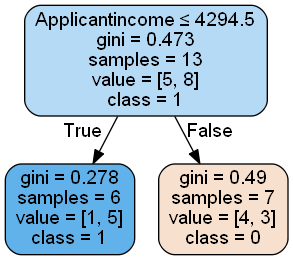

In [31]:
# visualize decision tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = student_feature,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

## Define evalution metrics for your model performance

In [32]:
#evaluation matrix 

print("Confusion Matrix : ",co_mx)

Confusion Matrix :  [[0 2]
 [0 2]]
